
# <span style="color:rgb(213,80,0)">Planteamiento de la cinemática inversa de la posición para un robot Dofbot</span>

## Resumen

Se presenta el planteamiento de la cinemática inversa de la posición del robot serial Dofbot de cinco grados de libertad. El modelo cinemático inverso de la posición planteado es mediente una solución geometrica del robot.

## Definición de las funcines

Matriz de transformaciones homógeneas


In [1]:
%Deficición de la función de manera simbolica
syms Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j)

%Definición de la transformación homógenea general
Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j) = [cos(ai_j)*cos(bi_j) cos(ai_j)*sin(bi_j)*sin(gi_j)-sin(ai_j)*cos(gi_j) sin(ai_j)*sin(gi_j)+cos(ai_j)*sin(bi_j)*cos(gi_j) x_i_j; sin(ai_j)*cos(bi_j) cos(ai_j)*cos(gi_j)+sin(ai_j)*sin(bi_j)*sin(gi_j) sin(ai_j)*sin(bi_j)*cos(gi_j)-cos(ai_j)*sin(gi_j) y_i_j; -sin(bi_j) cos(bi_j)*sin(gi_j) cos(bi_j)*cos(gi_j) z_i_j; 0 0 0 1]

## Plateamiento del modelo de la cinemática directa del robot

Para el planteamiento del modelo del robot se establece la relaciones de posición y orientación de cada eslabón al asociarlos con un sistema de referencia relativo relacionado, el cual se presenta en la siguiente figura.


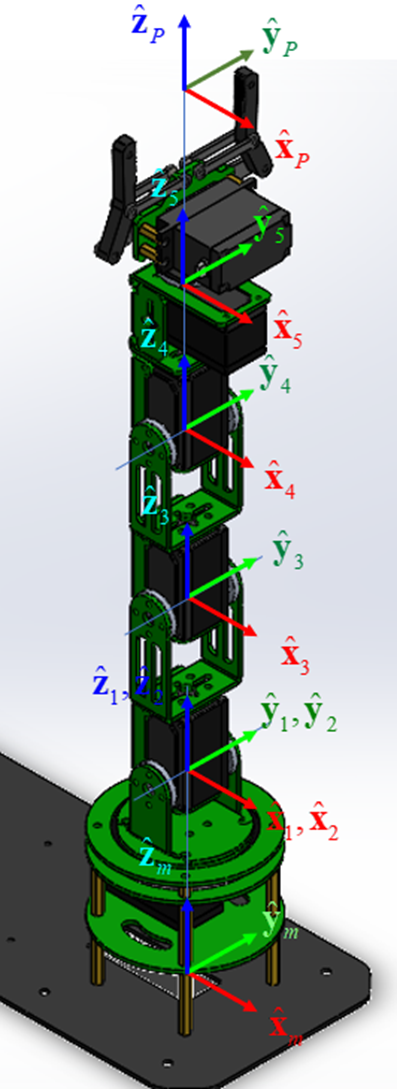



En sistma de referencia {m} está asociacdo al sistema inercial del robot y el sistema {P} está asociado con el efector final del robot en específico el punto en el cual los dedos de este pude tomar un objeto sin problemas.


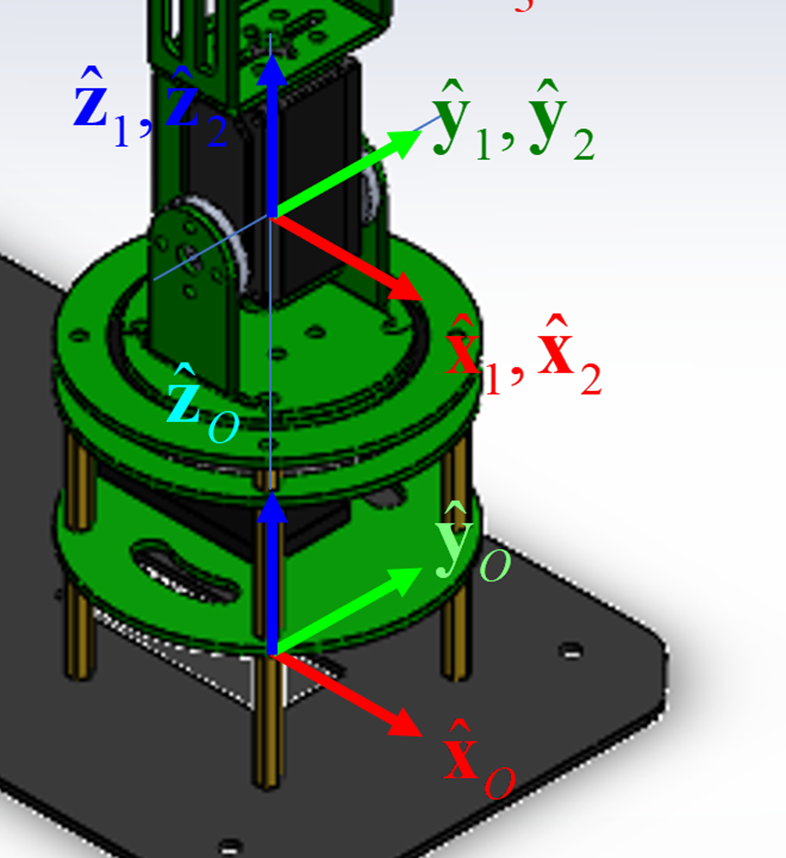




En la figura anterios se presenta los sistemas de referenia {1} y {2} cuyo origen comparten el mismo punto, el sistema {1} está asociado con el movimiento de la cintura del robot cuya junta rotacional gira con respecto al eje ${\widehat{\mathbf{z}} }_1$ y el sistema de referecia {2} está asociado con el sistema del hombro del robot el cual gira con respecto al eje ${\widehat{y} }_2$. La matriz de tranformación homógenea que describe la relaciones de posición y de orientación entre el sistema {1} y el sistema {0} es:



In [2]:
syms T_0_1 z_0_1 theta_0_1 T_1_2 theta_1_2 x_dot_0_1 x_ddot_0_1

T_0_1

In [3]:
T_0_1 = Tij(0,0,z_0_1,0,0,theta_0_1)

In [4]:

x_dot_0_1

In [5]:

x_ddot_0_1


El sistema {2} está asociado a la artículación del hombro del robot y su movimiento es una rotación con respecto al eje ${\widehat{y} }_2$, la matriz de transformación de este sistema es:


In [6]:
T_1_2

In [7]:
T_1_2 = Tij(0,0,0,0,theta_1_2,0)


En la siguiente imagen se presenta el sistema de referencia {3} asociado al codo del robot y el sistema de referencia {4} asociado al recodo de la muñeca del robot (bend).


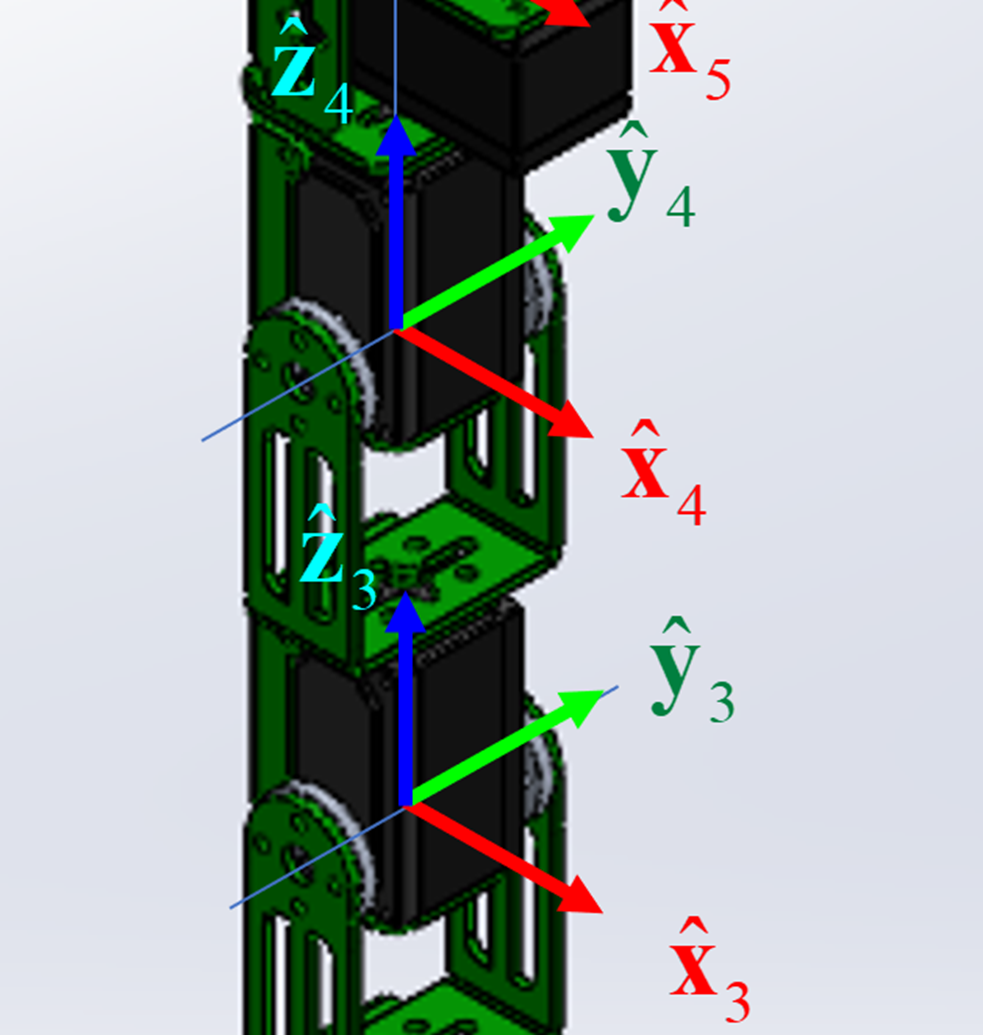


Las relaciones de posición y orientación entre el hombro y el codo del robot está dada en la matriz ${}^2{\mathbf{T}}_3$ la cual describe la longitud del antebrazo del robot ${}^2z_3$ y la restricción de la junta rotación asociada con el giro sobre el eje ${\widehat{y} }_3$.


In [8]:
syms T_2_3 z_2_3 theta_2_3 T_3_4 z_3_4 theta_3_4
T_2_3

In [9]:
T_2_3 = Tij(0,0,z_2_3,0,theta_2_3,0)


Las relaciones de posición y orientación entre el codo y el recodo del robot está dada en la matriz ${}^3{\mathbf{T}}_4$ la cual describe la longitud del antebrazo del robot ${}^3z_4$ y la restricción de la junta rotación asociada con el giro sobre el eje ${\widehat{y} }_4$.


In [10]:
T_3_4

In [11]:
T_3_4 = Tij(0,0,z_3_4,0,theta_3_4,0)


La muñeca del robot (wrist) está asocida la sistema {5} y punto donde el gripper puede tomar un objeto está asociado sobre el sistema {P}.



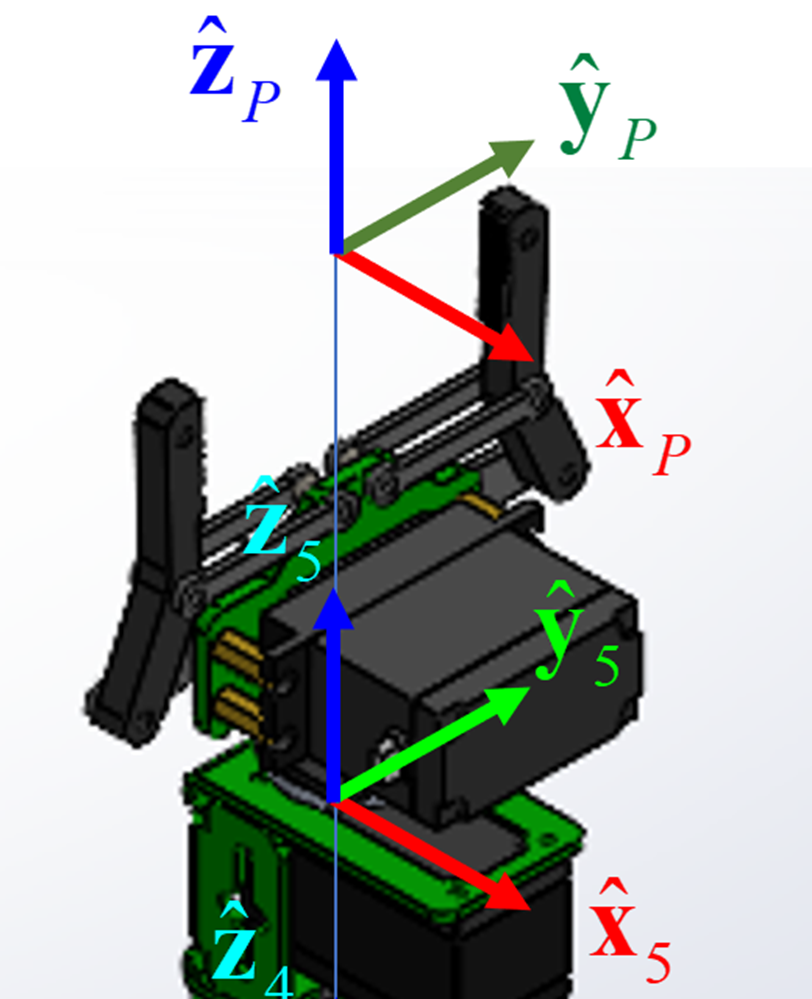



Las relaciones de posición y orientación entre el recodo y la muñeca del robot está dada en la matriz ${}^4{\mathbf{T}}_5$ la cual describe la longitud del antebrazo del robot ${}^4z_5$ y la restricción de la junta rotación asociada con el giro sobre el eje ${\widehat{z} }_5$.


In [12]:
syms T_4_5 z_4_5 theta_4_5 T_5_P z_5_P

T_4_5

In [13]:
T_4_5 = Tij(0,0,z_4_5,0,0,theta_4_5)


Y la matriz de la relación entre la muñeca y el gripper del robot es:


In [14]:
T_5_P

In [15]:
T_5_P = Tij(0,0,z_5_P,0,0,0)


El modelo cinemático directo de la posición es:


In [16]:
syms T_0_P

T_0_P = simplify(T_0_1*T_1_2*T_2_3*T_3_4*T_4_5*T_5_P)


Los parámetros de longitud del robot son:

<p style="text-align:left">
   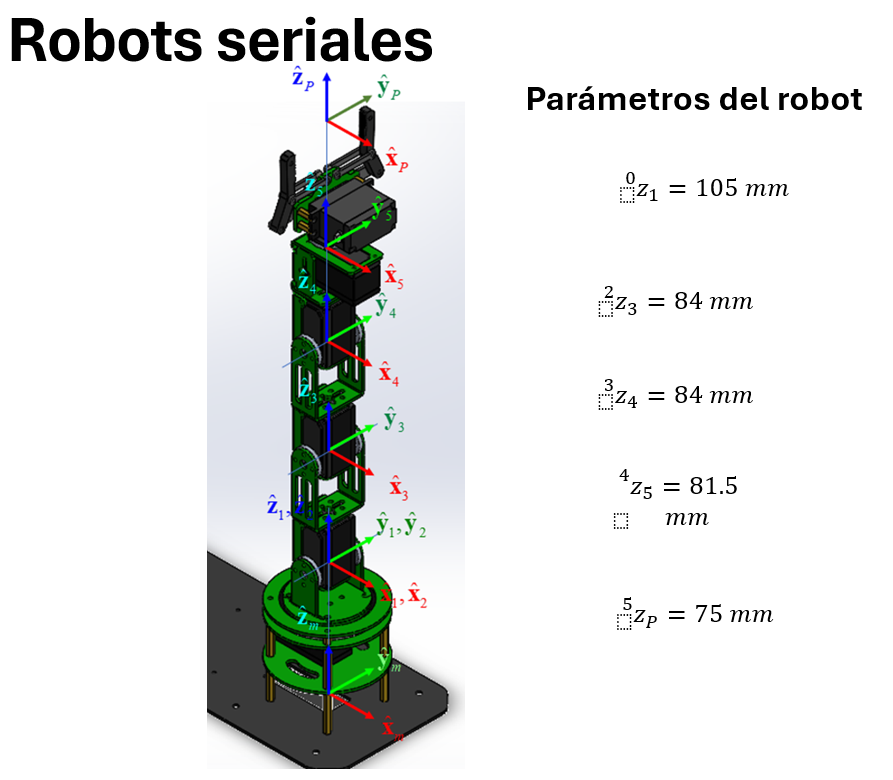
</p>



Sustituyendo en el modelo matemático:


In [17]:
syms T_0_P_real

T_0_P_real

In [18]:
T_0_P_real = vpa(simplify(subs(T_0_P,[z_0_1, z_2_3,z_3_4,z_4_5,z_5_P],[0.105,0.084,0.084,0.081,0.075])))




## Plantemiento de la cinemática inversa por desacoplamiento

Para el planteamiento de la solución del robot  se plantea el desacoplamiento de los elemetos de orientación del robot, por le que se establece la matriz de los elementos de posicionamiento del robot.


In [19]:
syms T_0_4 T_4_P

T_0_4

In [20]:
T_0_4 = simplify(T_0_1*T_1_2*T_2_3*T_3_4)


Los elementos de orientación del robot están contenidos en la siguiente matriz


In [21]:
T_4_P = simplify(T_4_5*T_5_P)

### Modelo cinemático de las velocidades
#### Modelo cinemático directo de las velocidades

El modelo cinemático de las velocidades consiste en determinar como las velocidades de las juntas producen las velocidades lineales y angulares sobre el efector final del robot.


Plantemiento del vector de postura del robot:


In [22]:
syms xi_O_P

xi_O_P

In [23]:
xi_O_P= [T_0_P(1,4);T_0_P(2,4);T_0_P(3,4);T_0_P(1,1);T_0_P(2,2);T_0_P(3,3)]


Cálculo del Jacobiano completo


In [24]:
syms J_theta

J_theta = simplify(jacobian(xi_O_P,[theta_0_1, theta_1_2,theta_2_3,theta_3_4,theta_4_5]))


Jacobiana de las velocidades lineales


In [25]:
syms p_O_P J_v

p_O_P

In [26]:
p_O_P = [T_0_P(1,4);T_0_P(2,4);T_0_P(3,4)]

In [27]:

J_v

In [28]:
J_v = jacobian(p_O_P,[theta_0_1, theta_1_2,theta_2_3,theta_3_4,theta_4_5])


En el caso del actuador asociado al ángulo $^4 \theta_5$ este no genera la ninguna velocidad angular sobre el efector final del robot, por lo que sus efectos se pueden omitir en el cálculo del Jacobiano lineal $J_v$


In [29]:
J_v = jacobian(p_O_P,[theta_0_1, theta_1_2,theta_2_3,theta_3_4])


En el caso del Jacobino de la velocidad angular $J_{\omega }$


In [30]:
syms J_omega theta_O_P

theta_O_P

In [31]:
theta_O_P = [T_0_P(1,1);T_0_P(2,2);T_0_P(3,3)]

In [32]:

J_omega

In [33]:
J_omega = jacobian(theta_O_P,[theta_0_1, theta_1_2,theta_2_3,theta_3_4,theta_4_5])

## Planteamiento de la cinemática inversa

Para el caso de este robot su matriz Jacobiana es no cuadrada por lo que es necesario determinar si existe su matriz pseudoinversa.



In [34]:
syms J_pse

J_pse = pinv(J_omega)

In [35]:
simplify(transpose(J_omega)*J_omega)

In [36]:
det(simplify(transpose(J_omega)*J_omega))


El determinate de la matriz de transición $||{\mathbf{J}}_{\theta }^T {\mathbf{J}}_{\theta } ||=0$, por lo anterior, no es posible determinar la solución de la cinemática inversa de todo el robot.




In [37]:
det(simplify(transpose(J_v)*J_v))




Para establecer el desacoplamiento es necesario establecer las matrices de transformación del robot.


Definición de las matrices de rotación


In [38]:
syms R_0_1 R_1_2 R_2_3 R_3_4 R_4_5 R_5_P R_0_4

R_0_1 = [T_0_1(1,1),T_0_1(1,2),T_0_1(1,3);T_0_1(2,1),T_0_1(2,2),T_0_1(2,3);T_0_1(3,1),T_0_1(3,2),T_0_1(3,3)]

In [39]:
R_1_2 = [T_1_2(1,1),T_1_2(1,2),T_1_2(1,3);T_1_2(2,1),T_1_2(2,2),T_1_2(2,3);T_1_2(3,1),T_1_2(3,2),T_1_2(3,3)]

In [40]:
R_2_3 = [T_2_3(1,1),T_2_3(1,2),T_2_3(1,3);T_2_3(2,1),T_2_3(2,2),T_2_3(2,3);T_2_3(3,1),T_2_3(3,2),T_2_3(3,3)]

In [41]:
R_3_4 = [T_3_4(1,1),T_3_4(1,2),T_3_4(1,3);T_3_4(2,1),T_3_4(2,2),T_3_4(2,3);T_3_4(3,1),T_3_4(3,2),T_3_4(3,3)]

In [42]:
R_4_5 = [T_4_5(1,1),T_4_5(1,2),T_4_5(1,3);T_4_5(2,1),T_4_5(2,2),T_4_5(2,3);T_4_5(3,1),T_4_5(3,2),T_4_5(3,3)]

In [43]:
R_5_P = [T_5_P(1,1),T_5_P(1,2),T_5_P(1,3);T_5_P(2,1),T_5_P(2,2),T_5_P(2,3);T_5_P(3,1),T_5_P(3,2),T_5_P(3,3)]


Matrices de rotación del desacoplamiento


In [44]:

R_0_4 = simplify(R_0_1*R_1_2*R_3_4)

In [45]:

R_4_P = simplify(R_4_5*R_5_P)

### Planteamiento del desacoplamiento de la orientación del efector final

La orientación del efector final del robot estada por la matriz de rotación ${}^0{\mathbf{R}}_P$ la cual se calcula de la siguiente manera:


$${}^0{\mathbf{R}}_P={}^0{\mathbf{R}}_4{}^4{\mathbf{R}}_P={\mathbf{R}}_T$$

Donde la matriz ${}^0{\mathbf{R}}_4$ está relacionada con los tres primeros grados de libertad del robot, y la matriz ${}^4{\mathbf{R}}_P$ esta relacionada directamente con la matriz de orientación del recodo y del codo del robot, y la matriz ${\mathbf{R}}_T$ describe al efector final del robot variables del espacio de trabajo. De la ecuación anterior se puede plantear la ubicación del sistema {4}


$${}^4{\mathbf{R}}_P={}^0{\mathbf{R}}^{-1}_4{\mathbf{R}}_T$$

Desarrollando


In [46]:
syms R_4_P_esp x_0_P y_0_P z_0_P beta_0_P alpha_0_P T_T

T_T = Tij(x_0_P,y_0_P,z_0_P,0,beta_0_P,alpha_0_P)

In [47]:
R_T = [T_T(1,1),T_T(1,2),T_T(1,3);T_T(2,1),T_T(2,2),T_T(2,3);T_T(3,1),T_T(3,2),T_T(3,3)]

In [48]:
simplify(inv(R_0_4))

In [49]:

R_4_P_esp = subs(simplify(inv(R_0_4)*R_T),[alpha_0_P],[theta_0_1])

In [50]:
simplify(inv(R_0_4)*R_T)


$${}^0{\mathbf{R}}_P={}^0{\mathbf{R}}_4{}^4{\mathbf{R}}_P={\mathbf{R}}_T$$

$${}^0{\mathbf{R}}_4=$$
$${}^4{\mathbf{R}}^{-1}_P{\cdot \mathbf{R}}_T$$


In [51]:
syms R_0_4_es

R_0_4_es = simplify(inv(R_4_P)*R_T)